# Predict Wine Quality with Regularization

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


## Logistic Regression Classifier without Regularization

In [18]:
df = pd.read_csv('wine_quality.csv')
print(df.columns)
wine_quality = df['quality']
features = df.drop(columns = ['quality'])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [19]:
# Standardize features by removing the mean and scaling to unit variance.
standard_scaler_fit = StandardScaler().fit(features)
wine_features = standard_scaler_fit.transform(features)

In [20]:
# Perform an 80:20 train-test split on the data. Set the random_state to 99 for reproducibility.
wf_train, wf_test, wc_train, wc_test = train_test_split(wine_features, wine_quality, test_size=0.2, random_state=99)

In [21]:
# Define a classifier, clf_no_reg, a logistic regression model without regularization and fit it to the training data.
clf_no_reg = LogisticRegression(penalty = 'none')
clf_no_reg.fit(wf_train, wc_train)

LogisticRegression(penalty='none')

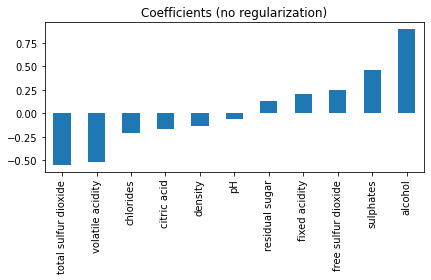

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting the coefficients obtained from fitting the Logistic Regression model.
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind='bar', title='Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

In [25]:
# f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically. 
# It takes values between 0 and 1 and the closer it is to 1, the better the classifier.
from sklearn.metrics import f1_score
wc_pred_test = clf_no_reg.predict(wf_test)
wc_pred_train = clf_no_reg.predict(wf_train)
print('Training Score', f1_score(wc_train, wc_pred_train))
print('Testing Score', f1_score(wc_test, wc_pred_test))


Training Score 0.7727598566308242
Testing Score 0.7266666666666667


## Logistic Regression with L2 Regularization

In [26]:
# Define a classifier, clf_default, a logistic regression model with Ridge regularization and fit it to the training data.
clf_default = LogisticRegression()
clf_default.fit(wf_train, wc_train)

wc_pred_train = clf_default.predict(wf_train)
wc_pred_test = clf_default.predict(wf_test)
 
print('Ridge-regularized Training Score', f1_score(wc_train, wc_pred_train))
print('Ridge-regularized Testing Score', f1_score(wc_test, wc_pred_test))

Ridge-regularized Training Score 0.7727598566308242
Ridge-regularized Testing Score 0.7266666666666667


The scores remain the same
This means that the constraint boundary for the regularization we performed is large enough to hold the original loss function minimum, thus rendering our model the same as the unregularized one.

Let's tune up regularization strength.

In [29]:
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(wf_train, wc_train)
    wc_pred_test = clf.predict(wf_test)
    wc_pred_train = clf.predict(wf_train)
    training_array.append(f1_score(wc_train, wc_pred_train))
    test_array.append(f1_score(wc_test, wc_pred_test))

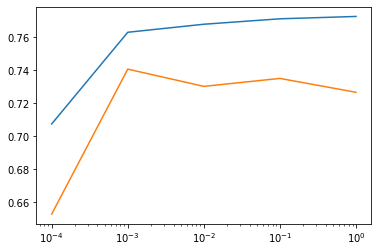

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(C_array, training_array)
plt.plot(C_array, test_array)
plt.xscale('log')
plt.show()
plt.clf()


The optimal C seems to be somewhere around 0.001 so a <u>search window between 0.0001 and 0.01 is not a bad idea</u>.

## Hyperparameter Tuning for L2 Regularization
Let's perform hyperparameter tuning using GridSearchCV.

In [32]:
C_array  = np.logspace(-4, -2, 100)
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}

In [34]:
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
# Set the scoring metric to ‘f1’ and the number of folds to 5.
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(wf_train, wc_train) 
print(gs.best_params_, gs.best_score_)


{'C': 0.0019630406500402726} 0.7723336222647887


In [35]:
# Defining new classifier clf_best_ridge that corresponds to the best C value obtained in the previous task.
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(wf_train,wc_train)
wc_pred_best = clf_best.predict(wf_test)
print(f1_score(wc_test,wc_pred_best))

0.7407407407407408


## Feature Selection using L1 Regularization
We’re now going to use a grid search cross-validation method to regularize the classifier, but with L1 regularization instead.

In [36]:
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(features, wine_quality)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [37]:
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)

Best C value [32.74549163]
Best fit coefficients [[ 0.08535985 -3.31072634 -1.26094047  0.03635881 -3.99257787  0.02276093
  -0.01661609 -3.24642052 -0.69063364  2.71560093  0.9089266 ]]



We can now reproduce the coefficient plot we’d produced for the unregularized scenario.


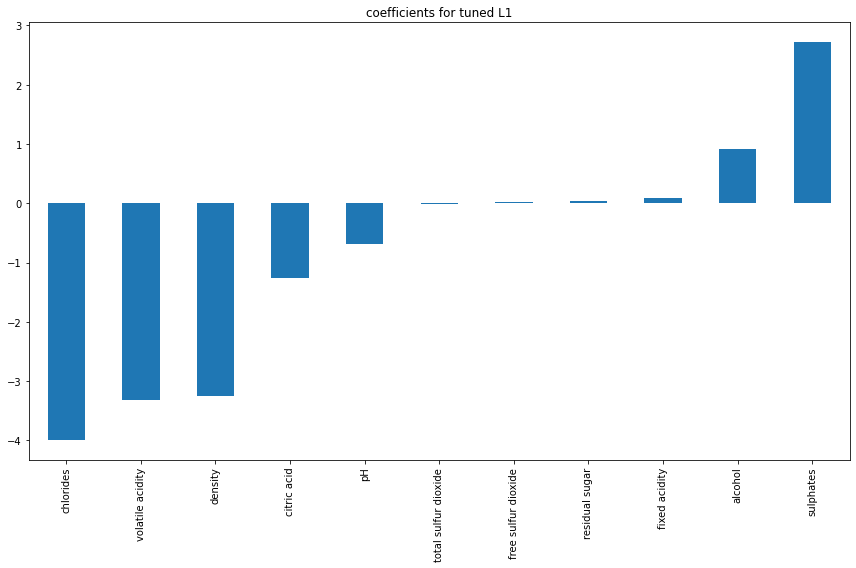

<Figure size 432x288 with 0 Axes>

In [42]:
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title= 'coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()